# Vehicle Models

The dataset consists of two parts namely: _vehicle dictionary_ and _vehicle specs_

The vehicle dictionary contains the information about _vehicle id, vehicle name, model_ and _origin_. And vehicle specs contains information about _mpg, cylinders, displacement, horsepower, weight, acceleration, vehicle id_ and other empty columns such _unnamed0, unnamed1, unnamed2 and unnamed3_.


<p><b>Research Study:</b>
    The purpose of this study is to find out:
    <ul>
        <li>Which vehicle has the best mpg</li>
        <li>How horsepower affects a vehicle's acceleration</li>
        <li>How vehicles are designed and how they work</li>
    </ul>
</p>

#### We will be using Pandas and Seaborn packages for data analysis and visualization respectively through out this task.

## Import Libraries

In [37]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

### Import the dataset

In [71]:
# Import the first dataset
df = pd.read_csv('vehicle_specs.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,unnamed0,vehicle id,unnamed1,unnamed2,unnamed3
0,18.0,8,307,130,3504,12.0,NaN,C-1689780,NaN,NaN,NaN
1,15.0,8,350,165,3693,11.5,NaN,B-1689791,NaN,NaN,NaN
2,18.0,8,318,150,3436,11.0,NaN,P-1689802,NaN,NaN,NaN
3,16.0,8,304,150,3433,12.0,NaN,A-1689813,NaN,NaN,NaN
4,17.0,8,302,140,3449,10.5,NaN,F-1689824,NaN,NaN,NaN


In [72]:
# Import the second dataset
df2 = pd.read_csv('vehicle_dictionary.csv')
df2.head()

,vehicle id,vehicle name,model,origin
0,C-1689780,chevrolet chevelle malibu,70,1
1,B-1689791,buick skylark 320,70,1
2,P-1689802,plymouth satellite,70,1
3,A-1689813,amc rebel sst,70,1
4,F-1689824,ford torino,70,1


### Data Wrangling

Now let's drop empty columns from the first dataset

In [73]:
# Drop empty comlumns
df =  df.drop(['unnamed0', 'unnamed1', 'unnamed2', 'unnamed3'],axis=1)
df.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,vehicle id
0,18.0,8,307,130,3504,12.0,C-1689780
1,15.0,8,350,165,3693,11.5,B-1689791
2,18.0,8,318,150,3436,11.0,P-1689802


#### Lets join the two dataframes / datasets with the help of pandas merge function using the "vehicle id" column. 

In [74]:
df = pd.merge(df, df2, on="vehicle id")
df.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,vehicle id,vehicle name,model,origin
0,18.0,8,307,130,3504,12.0,C-1689780,chevrolet chevelle malibu,70,1
1,15.0,8,350,165,3693,11.5,B-1689791,buick skylark 320,70,1
2,18.0,8,318,150,3436,11.0,P-1689802,plymouth satellite,70,1


In [75]:
# Shape of the dataset
df.shape

(398, 10)

### Check for the missing values

#### Convert "?" to NaN

In [81]:
import numpy as np

# Replace "?" by NaN
df.replace("?", np.nan, inplace=True)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,vehicle id,vehicle name,model,origin
0,18.0,8,307,130,3504,12.0,C-1689780,chevrolet chevelle malibu,70,1
1,15.0,8,350,165,3693,11.5,B-1689791,buick skylark 320,70,1
2,18.0,8,318,150,3436,11.0,P-1689802,plymouth satellite,70,1
3,16.0,8,304,150,3433,12.0,A-1689813,amc rebel sst,70,1
4,17.0,8,302,140,3449,10.5,F-1689824,ford torino,70,1


In [231]:
missing_data = df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")

mpg
False    398
Name: mpg, dtype: int64

cylinders
False    398
Name: cylinders, dtype: int64

displacement
False    398
Name: displacement, dtype: int64

horsepower
False    398
Name: horsepower, dtype: int64

weight
False    398
Name: weight, dtype: int64

acceleration
False    398
Name: acceleration, dtype: int64

vehicle id
False    398
Name: vehicle id, dtype: int64

vehicle name
False    398
Name: vehicle name, dtype: int64

model
False    398
Name: model, dtype: int64

origin
False    398
Name: origin, dtype: int64

L/100km
False    398
Name: L/100km, dtype: int64



From the above output we can see that the horsepower column has 6 missing values. Therefore we can replace the missing values with the average of the horsepower observations.

#### Calculate mean of the horsepower column

In [83]:
# Find the mean
horsepower_avg = df['horsepower'].astype('float').mean(axis=0)
print("Average horsepower is: ", horsepower_avg)

Average horsepower is:  104.46938775510205


#### Replace the missing values with the mean of the horsepower column

In [84]:
#
df['horsepower'].replace(np.nan, horsepower_avg, inplace=True)

In [91]:
df.dtypes

mpg             float64
cylinders         int64
displacement      int64
horsepower        int64
weight            int64
acceleration    float64
vehicle id       object
vehicle name     object
model             int64
origin            int64
dtype: object

In [90]:
# Change the data type of horsepower column to int
df['horsepower'] = df['horsepower'].astype('int64')

In [93]:
df.dtypes

mpg             float64
cylinders         int64
displacement      int64
horsepower        int64
weight            int64
acceleration    float64
vehicle id       object
vehicle name     object
model             int64
origin            int64
dtype: object

### Data Standardization

Transform mpg to L/100km

**Formula:** L/100km = 235/mpg

In [94]:
# Convert mpg to L/100km
df['L/100km'] = 235/df['mpg']

# Print the first five rows
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,vehicle id,vehicle name,model,origin,L/100km
0,18.0,8,307,130,3504,12.0,C-1689780,chevrolet chevelle malibu,70,1,13.055556
1,15.0,8,350,165,3693,11.5,B-1689791,buick skylark 320,70,1,15.666667
2,18.0,8,318,150,3436,11.0,P-1689802,plymouth satellite,70,1,13.055556
3,16.0,8,304,150,3433,12.0,A-1689813,amc rebel sst,70,1,14.687500
4,17.0,8,302,140,3449,10.5,F-1689824,ford torino,70,1,13.823529


#### Let's get the summary of the dataset

In [95]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,L/100km
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.427136,104.462312,2970.424623,15.568090,76.010050,1.572864,11.202826
std,7.815984,1.701004,104.268683,38.199230,846.841774,2.757689,3.697627,0.802055,3.898522
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000,5.042918
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,1.000000,8.103448
50%,23.000000,4.000000,148.500000,95.000000,2803.500000,15.500000,76.000000,1.000000,10.217391
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000,13.428571
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000,26.111111


### Which vehicle has the best mpg?

From  the above summary we can see that the best mpg is 46.0

Now let us obtain the vehicle with the mpg of 46.0

In [103]:
df.loc[df['mpg'] == df['mpg'].max()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,vehicle id,vehicle name,model,origin,L/100km
322,46.6,4,86,65,2110,17.9,M-1693322,mazda glc,80,3,5.042918


In [105]:
# Name of the vehicle with the best mpg
df.loc[322, 'vehicle name']

'mazda glc'

### How horsepower affects a vehicle's acceleration?

First we can find the relationship between the horsepower and acceleration

In [110]:
df[['horsepower', 'acceleration']].corr()

,horsepower,acceleration
horsepower,1.000000,-0.684376
acceleration,-0.684376,1.000000


We can see from the above output that horsepower has a negative relationship with acceleration having a correlation of -0.684376.

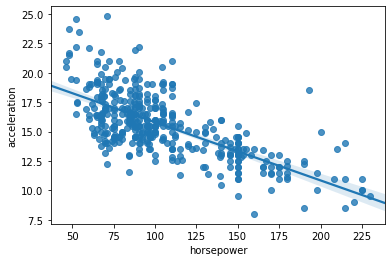

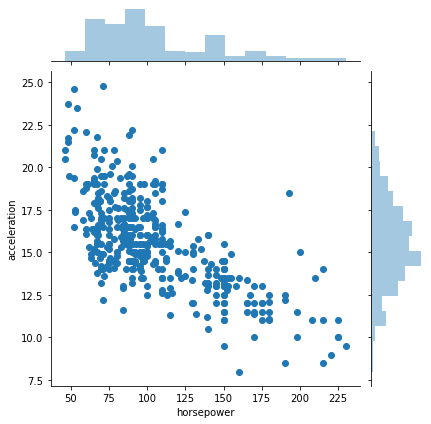

In [171]:
# Ploting the horsepower against acceleration
sns.regplot(x=df['horsepower'], y=df['acceleration'], data=df)
sns.jointplot(x=df['horsepower'], y=df['acceleration'], data=df)
plt.show()

The Regression and Joint Plots confirm that the horsepower and accelaration variables have negative relationship. That is, the horsepower affects the acceleration of a vehicle negatively.

### Checking if the weight affects the acceleration of a vehicle

<AxesSubplot:xlabel='weight', ylabel='acceleration'>

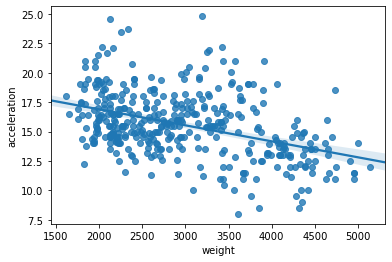

In [121]:
# Regression plot of Weight against acceleration
sns.regplot(x='weight', y='acceleration', data=df)

The regression plot above suggests that there is arguably relationship between weight and acceleration claiming that weight does impact the acceleration of a vehicle.

In [123]:
df[['cylinders', 'acceleration']].corr()

,cylinders,acceleration
cylinders,1.000000,-0.505419
acceleration,-0.505419,1.000000


### Which vehicle has the  highest "acceleration"?

In [132]:
df.loc[df['acceleration'] == df['acceleration'].max(), 'vehicle id': 'model']

,vehicle id,vehicle name,model
299,P-1693069,peugeot 504,79


<p><b>Peugeot 504</b> model 79 has the highest acceleration.
</p>

### Does number of cylinders in a vehicle affect its weight?

<AxesSubplot:xlabel='cylinders', ylabel='weight'>

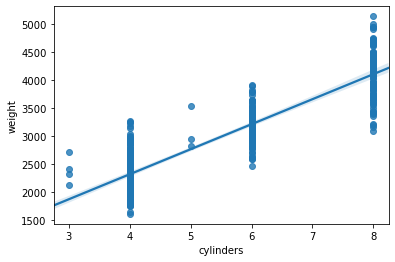

In [195]:
sns.regplot(x='cylinders', y='weight', data=df)

In [136]:
# Correlation between weight and number of cylinders
df[['weight', 'cylinders']].corr()

,weight,cylinders
weight,1.000000,0.896017
cylinders,0.896017,1.000000


We can see from the regression plot above that there is a strong positive relationship between the weight and the number of cylinders of a vehicle. The correlation between these two variables is <b>0.896017.</b> This claims that vehicles with the most number of engine cylinders tend to be heavier. 

### What is the relationship between engine "cylinders" and "mpg"?

In [194]:
df[['cylinders', 'mpg']].corr()

,cylinders,mpg
cylinders,1.000000,-0.775396
mpg,-0.775396,1.000000


Text(0.5, 1.0, 'The relationship between engine cylinders and mpg')

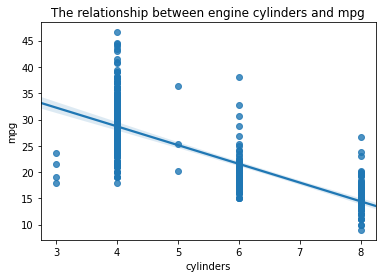

In [237]:
sns.regplot(x='cylinders', y='mpg', data=df)
plt.title('The relationship between engine cylinders and mpg')

According to the regresion plot above the "cylinders" variable has a negative relationship with "mpg" variable since the regression line is sloping down. That is to say the more number of engine "cylinders" a vehicle has the less its "mpg". In other words vehicles that have more number of engine cylinders consume more fuel in a less distance.

### What number of cylinders is found in most vehicles?

In [241]:
#### What number engine cylinders is found in most vehicles?
df['cylinders'].value_counts()

4    204
8    103
6     84
3      4
5      3
Name: cylinders, dtype: int64

   cylinders
4        204
8        103
6         84
3          4
5          3


Text(0, 0.5, 'Frequency')

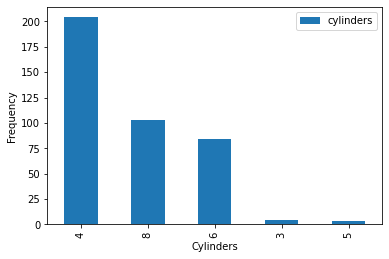

In [263]:
cylinders = df['cylinders'].value_counts().to_frame()
print(cylinders)
cylinders.plot(kind='bar')

plt.xlabel('Cylinders')
plt.ylabel('Frequency')

We can see from the output of the function **value_counts()** and the bar chart above that most cars use 4 engine cylinders 

In [270]:
df.loc[df['acceleration'] == df['acceleration'].max()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,vehicle id,vehicle name,model,origin,L/100km
299,27.2,4,141,71,3190,24.8,P-1693069,peugeot 504,79,2,8.639706


<AxesSubplot:>

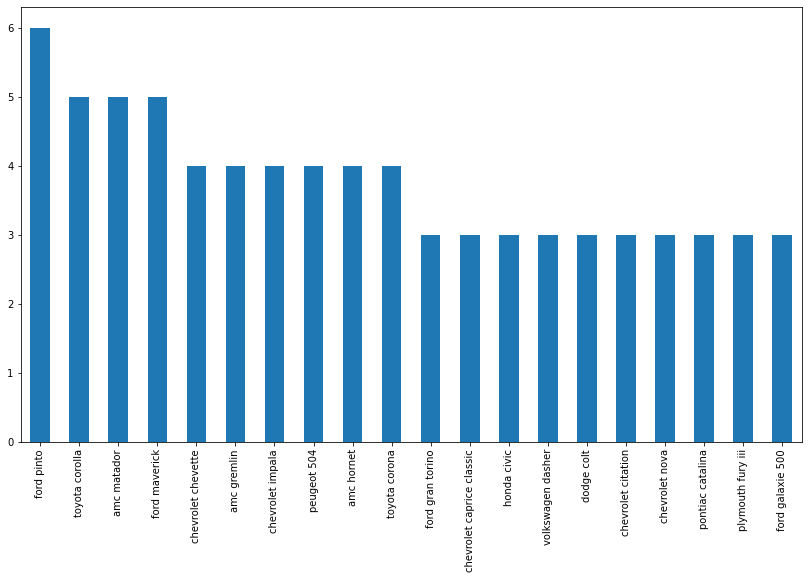

In [262]:
#df[(df['cylinders'] == 8) & (df['mpg'] > 30)]  #df['mpg'] < 20] 
df['vehicle name'].value_counts().nlargest(20).plot(kind='bar', figsize=(14,8))

### Thank you for reading this notebook!

## Author
<a href = 'https://www.linkedin.com/in/mosimanegape-mholo-4506a9220/'>Mosimanegape Mholo - LinkedIn</a>

<a href='https://www.kaggle.com/mosimanegapemholo'>Mosimanegape Mholo - Kaggle</a>

Degree in BSc Pure & Applied Mathematics

Dataset By Kaggle: 